# Linear Regression

We will discuss how to build a Linear Regression model from scratch. We will focus on three main methodes

* Gradient Descent
* Stochastic Gradient Descent (SGD)
* Stochastic Gradient Descent (SGD) with Momentum
* Mini-Batch Gradient Descent

# Required Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Dataset

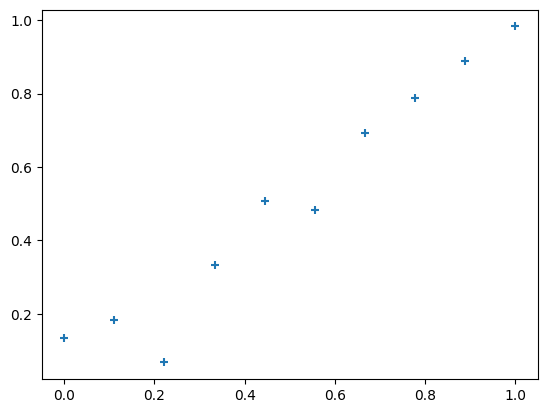

In [37]:
# Set seed to allow reproducerbility
np.random.seed(10)
xtrain = np.linspace(0,1, 10)
ytrain = xtrain + np.random.normal(0, 0.1, (10,))

xtrain = xtrain.reshape(-1, 1)
ytrain = ytrain.reshape(-1, 1)

# Plot The Data in scatter plot
plt.scatter(xtrain, ytrain, marker="+")
plt.show()

# Hypothesis
Let us begin with the hypothesis

Here, in our one dimensional data, it's easy to observe a linear relationship between our features and targets. So we may settle on the linear function below

$$y = X\beta$$

where, $X \in \mathbb{R}^{N \times D}, \beta \in \mathbb{R}^{D}, y \in \mathbb{R}^N$

## make prediction
$$\hat{y} = X\beta$$

In [38]:
def make_prediction(X, beta):
  """
  Compute the dot product of X$\beta$
  Args:
    X: feature matrix (size - N x D)
    theta: parameters (size - D x 1)

  Returns:
    output y, size N x 1
  """
  assert X.ndim > 1
  assert beta.ndim > 1
  assert X.shape[1]==beta.shape[0],f"the number of columns of X:{X.shape[1]} is different from the number of rows of theta{beta.shape[0]}"
  return X.dot(beta)

# Plot Functions 
This two functions will help us plot the fitted line and the loss.

In [39]:
def plot(X, y, beta,epoch):
  """Plotting function for features and targets"""
  xtest = np.linspace(0, 1, 10).reshape(-1,1)
  ypred = make_prediction(xtest, beta).reshape(-1,1)
  plt.scatter(X, y, marker="+")
  plt.xlabel("feature")
  plt.ylabel("target")
  plt.plot(xtest, ypred, color="orange")
  plt.show()

def plot_loss(losses):
  """Plotting function for losses"""
  plt.plot(losses)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("training curve")

## Compute Loss
To compute loss we use the mean square error since it's a regression problem. The mean square error is give as 

$$
\begin{align*}
Loss_{mse} &= \frac{1}{n} \sum_{i=1}^{n} \left( f(x_i) - y_i \right)^2\\ 
           &= \frac{1}{n} \sum_{i=1}^{n} \left( \hat{y} - y_i \right)^2 \quad \text{where } \hat{y} = x_i\beta
\end{align*}
$$


In [40]:
# compute the mean square error
def mean_squared_error(ytrue, ypred):
  """
  Computes the mean squared error
  Args:
    ytrue: vector of true labels
    ypred: vector of predicted labels

  Returns:
    mse loss (scalar)
  """
  return np.mean((ytrue - ypred)**2)

## Computes Gradients of Loss

$$
\begin{align*}
\nabla_{\beta} L(\beta) &= \frac{2}{N} (2 X^\top X \beta - 2 X^\top Y)\\
                        &= \frac{2}{N} (X^\top X \beta - X^\top Y)
\end{align*}
$$

In [41]:
def gradient_function(X, y,beta):
  """Computes gradients of loss wrt parameters
  Args:
    X: input features of size - N x D
    y: target vector of size - N x 1
    beta: parameters of size - D x 1
  """
  N,D = X.shape
  return (2/N) * (X.T@X@beta - X.T @y)

## The Update Rule

$$
\beta^{(t+1)} = \beta^{(t)} - \eta \nabla f(\beta^{(t)})
$$
Where:
* $\eta$ - Step size(Learning rate)
* $\nabla f(\beta^{(t)})$ - Gradient at $\beta^{(t)}$

In [42]:
def update_function(beta, grads, step_size):
  """Updates parameters with gradients
  Args:
    beta : parameters of size D x 1
    grads: gradients of size D x 1

  Returns:
    updated parameters of size D x 1
  """
  return beta - step_size*grads

## Initializes parameter beta
Here we initialize the weights with zeros

In [43]:
def initialize_beta(D):
  """Initializes parameter beta
  Args:
    D: size of parameter
  Returns:
    initial parameters of size D x 1
  """
  return np.zeros((D,1))

## 1. Batch Gradient Descent

Batch Gradient Descent computes the gradient using the **entire dataset** and updates the parameters at the end of each epoch.

### **Input:**  
- Dataset: $ D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n} $ 
- Learning rate: $ \epsilon $  
- Number of epochs  
- Tolerance: `tol`

### **Output:**  
- Optimized weight vector $ \beta $

### **Algorithm:**

```text
1. Initialize β₀ = 0 ∈ ℝᵈ
2. for epoch in number of epochs do:
    3. Shuffle the dataset D
    4. Compute predictions: ŷ = X β₀
    5. Compute loss: L = (1/n) ‖ŷ − y‖²
    6. Compute gradient: ∇βf(β₀) = (2/n)  (XᵀXβ₀ − Xᵀy)
    7. Update weights: β₁ = β₀ − ε ∇βf(β₀)
    8. if ‖y − X β₁‖² < tol then:
        9. break
    10. β₀ = β₁

```


Epoch 0, loss 0.35154247678265527

Epoch 1, loss 0.30457618777153206

Epoch 2, loss 0.26398739251790004

Epoch 3, loss 0.22891009910536142

Epoch 4, loss 0.19859590757884088

Epoch 5, loss 0.17239804227894623

Epoch 6, loss 0.14975755240571353

Epoch 7, loss 0.13019138639057587

Epoch 8, loss 0.11328208563447595

Epoch 9, loss 0.09866887772041484

Epoch 10, loss 0.08603997906755116

Epoch 11, loss 0.07512594279829102

Epoch 12, loss 0.06569390989020243

Epoch 13, loss 0.057542640956834944

Epoch 14, loss 0.05049822265682008

Epoch 15, loss 0.04441035712432024

Epoch 16, loss 0.03914915525308537

Epoch 17, loss 0.03460236541646442

Epoch 18, loss 0.03067297849606721

Epoch 19, loss 0.027277158120594718

Epoch 20, loss 0.02434245195495489

Epoch 21, loss 0.02180624587619667

Epoch 22, loss 0.019614428054964213

Epoch 23, loss 0.01772023443966289

Epoch 24, loss 0.016083251010889248

Epoch 25, loss 0.014668551518486398

Epoch 26, loss 0.013445952304208312

Epoch 27, loss 0.01238936831108

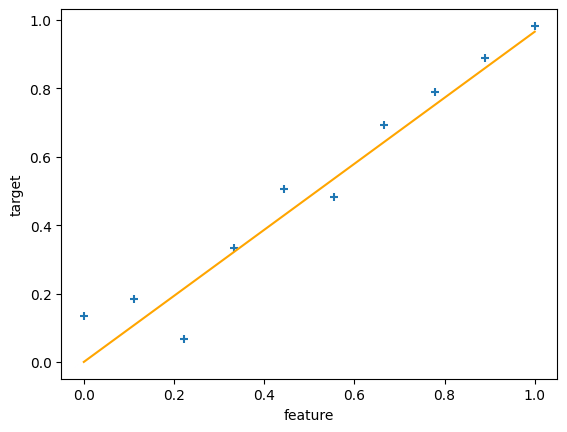

Final weights (β): [[0.96566447]]


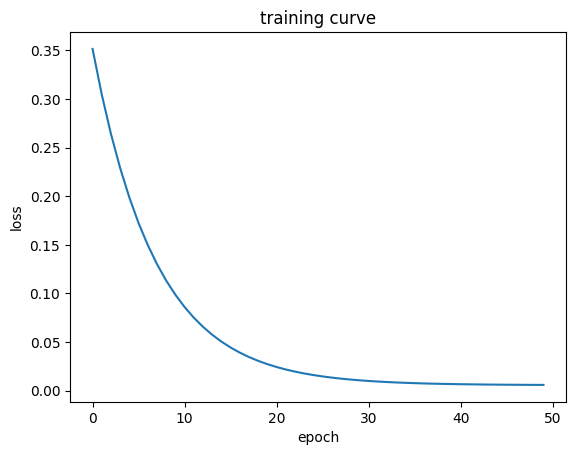

In [44]:
# Hyperparameters
epsilon = 0.1       # Learning rate
epochs = 50         # Maximum number of epochs
tol = 1e-6          # Tolerance

# Initialize weights β₀ = 0 ∈ ℝᵈ
N,D = xtrain.shape
beta = initialize_beta(D)

# To Store loss
losses = []

# Batch Gradient Descent
for epoch in range(epochs):
    # Shuffle dataset
    idx = np.random.permutation(N)
    X_shuffled = xtrain[idx]
    y_shuffled = ytrain[idx]
    
    # Compute predictions
    ypred = make_prediction(X_shuffled ,beta)
    
    # Compute loss
    N,M = y_shuffled.shape
    loss = mean_squared_error(y_shuffled,ypred)
    
    # Compute gradient
    gradient = gradient_function(X_shuffled, y_shuffled,beta)
    
    # Update weights
    beta_new = update_function(beta,gradient,epsilon) 
    
    # Check for convergence
    if np.sum((y_shuffled - X_shuffled @ beta_new) ** 2) < tol:
        print(f"Converged at epoch {epoch}")
        beta = beta_new
        break

    # Update beta
    beta = beta_new
    
    losses.append(loss)
    print(f"\nEpoch {epoch}, loss {loss}")
    if epoch == epochs-1:
        plot(X_shuffled, y_shuffled, beta,epoch)
    

print("Final weights (β):",beta)
plot_loss(losses)


## 2. Stochastic Gradient Descent

Stochastic Gradient Descent updates the weights after processing each individual **data point**. This approach tends to converge faster, but the updates are noisy.

### **Input:**  
- Dataset: $ D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n} $  
- Learning rate: $ \epsilon $  
- Number of epochs  
- Tolerance: `tol`

### **Output:**  
- Optimized weight vector $ \beta $

### **Algorithm:**

```text
1. Initialize β₀ = 0 ∈ ℝᵈ
2. for epoch in number of epochs do:
    3. Shuffle the dataset D
    4. for i = 1 to n do:
        5. Compute prediction for observation i: ŷᵢ = xᵢᵀ β₀
        6. Compute loss: L = (ŷᵢ − yᵢ)²
        7. Compute gradient: ∇βf(β₀) = 2 ( xᵢxᵢᵀ β₀ − xᵢyᵢ ) 
        8. Update weights: β₁ = β₀ − ε ∇βf(β₀)
        9. if (ŷᵢ − yᵢ)² < tol then:
            10. break
    11. β₀ = β₁
```

Epoch 0, loss 0.21151473480957303
Epoch 1, loss 0.05071479372912442
Epoch 2, loss 0.015971877649845468
Epoch 3, loss 0.008060121613992883
Epoch 4, loss 0.006351356780746107
Epoch 5, loss 0.005880517507316503
Epoch 6, loss 0.005772121674481321
Epoch 7, loss 0.005755846529504042
Epoch 8, loss 0.005738732002989325
Epoch 9, loss 0.005737973456579263


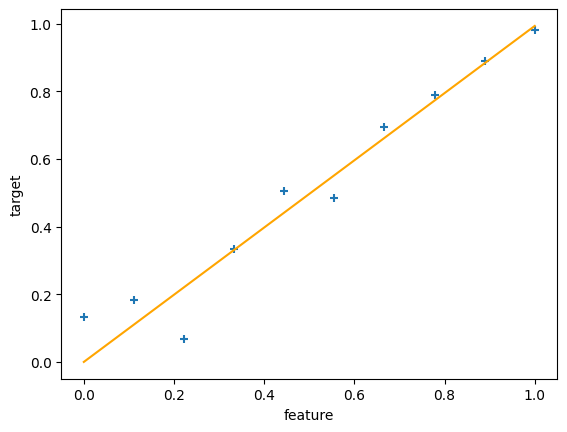

Final weights (β): [[0.99313449]]


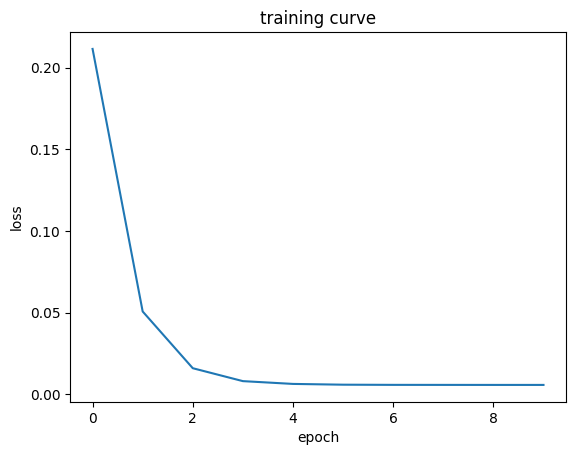

In [45]:
# Hyperparameters
epsilon = 0.1       # Learning rate
epochs = 10         # Maximum number of epochs
tol = 0.001         # Tolerance

# Initialize weights β₀ = 0 ∈ ℝᵈ
N,D = xtrain.shape
beta = initialize_beta(D)

# To Store loss
losses = []

# Stochastic Gradient Descent
epoch = 0
avg_loss = float("inf")

while epoch < epochs and avg_loss > tol:
    running_loss = 0.0
    idx = np.random.permutation(N)
    shuffled_x = xtrain[idx]
    shuffled_y = ytrain[idx]

    for idx in range(shuffled_x.shape[0]):
        sample_x = shuffled_x[idx].reshape(-1, D)
        sample_y = shuffled_y[idx].reshape(-1, 1)
        ypred = make_prediction(sample_x,beta) 
        loss = mean_squared_error(sample_y,ypred) 
        running_loss += loss
        grads = gradient_function(sample_x,sample_y,beta) 
        beta =update_function(beta,grads,epsilon)

    avg_loss = running_loss/ N
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")

    epoch += 1

plot(xtrain, ytrain, beta, epoch)
print("Final weights (β):",beta)
plot_loss(losses)


## 3. Stochastic Gradient Descent with Momentum

**Momentum** is an enhancement to standard SGD that helps accelerate gradient descent in the relevant direction and dampens oscillations. It is particularly useful in scenarios where the optimization landscape has high curvature, small but consistent gradients, or noisy updates.

### **Motivation:**

- **Variance in SGD**: Helps smooth out noisy gradients by using an exponentially decaying moving average.
- **Poor conditioning**: Helps accelerate through narrow valleys and avoids getting stuck.

### **Concept:**

We introduce a **velocity vector** $v$ that accumulates the exponentially decaying average of past gradients:

- $v$ is initialized to zero
- $\beta$ is the **momentum coefficient** (typically $\beta \in [0.9, 0.99]$)
- $\epsilon$ is the learning rate

### **Update Rule:**

```math
v_t = \beta v_{t-1} + (1 - \beta) \nabla_\beta \mathcal{L}(\beta_{t-1})
```

```math
\beta_t = \beta_{t-1} - \epsilon v_t
```

This adds "inertia" to the parameter updates, similar to how momentum works in physics.

---

### **Algorithm:**

**Input:**
- Dataset: $ D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n} $  
- Learning rate: $ \epsilon $  
- Momentum coefficient: $ \beta $  
- Number of epochs  
- Tolerance: `tol`

**Output:**
- Optimized weight vector $ \beta $

```text
1. Initialize β₀ = 0 ∈ ℝᵈ
2. Initialize velocity vector v = 0 ∈ ℝᵈ
3. for epoch in number of epochs do:
    4. Shuffle the dataset D
    5. for i = 1 to n do:
        6. Compute prediction for observation i: ŷᵢ = xᵢᵀ β₀
        7. Compute gradient: ∇βf(β₀) = 2 ( xᵢxᵢᵀ β₀ − xᵢyᵢ ) 
        8. Update velocity: v = β ⋅ v + (1 - β) ⋅ ∇βf(β₀)
        9. Update weights: β₁ = β₀ − ε ⋅ v
        10. if (ŷᵢ − yᵢ)² < tol then:
            11. break
    12. β₀ = β₁
```


Epoch 0, loss 0.3448302426299378
Epoch 1, loss 0.31485331534083605
Epoch 2, loss 0.28764990571228677
Epoch 3, loss 0.26810660857262303
Epoch 4, loss 0.2469036264455072
Epoch 5, loss 0.230385160236739
Epoch 6, loss 0.2154949737579776
Epoch 7, loss 0.1941992808192564
Epoch 8, loss 0.17848257850638521
Epoch 9, loss 0.16512397391873532
Epoch 10, loss 0.15018992776092505
Epoch 11, loss 0.13970463701718164
Epoch 12, loss 0.13142261088826498
Epoch 13, loss 0.11987610269010737
Epoch 14, loss 0.11256860652867613
Epoch 15, loss 0.10429245628586455
Epoch 16, loss 0.09853620957420849
Epoch 17, loss 0.09110123766191026
Epoch 18, loss 0.08578036992392882
Epoch 19, loss 0.07950882027688665
Epoch 20, loss 0.0738851944724364
Epoch 21, loss 0.0699600722253779
Epoch 22, loss 0.06448969290735365
Epoch 23, loss 0.05932831900192705
Epoch 24, loss 0.05480359299934179
Epoch 25, loss 0.05066523364510221
Epoch 26, loss 0.04706703770987337
Epoch 27, loss 0.042758746899898926
Epoch 28, loss 0.039975379672824676
E

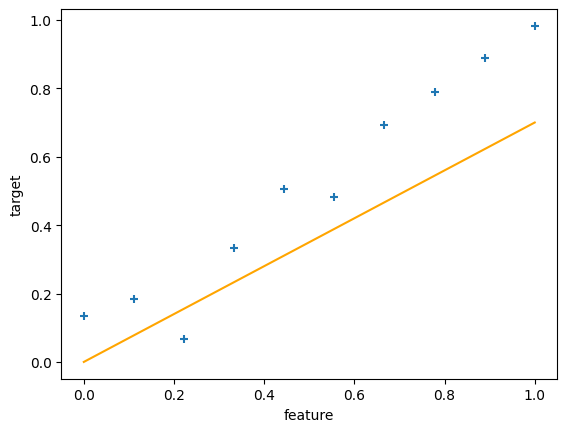

Final weights (β): [[0.70010986]]


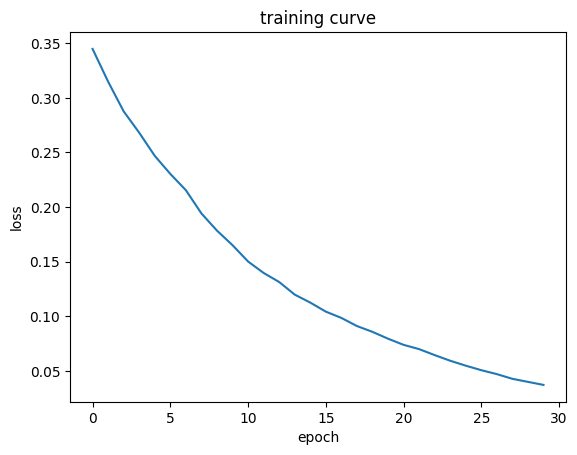

In [46]:
# Hyperparameters
epsilon = 0.1       # Learning rate
epochs = 30         # Maximum number of epochs
tol = 0.001         # Tolerance
beta_m = 0.99

# Initialize weights β₀ = 0 ∈ ℝᵈ
N,D = xtrain.shape
beta = initialize_beta(D)

# To Store loss
losses = []

# Stochastic Gradient Descent with momentum
epoch = 0
avg_loss = float("inf")

while epoch < epochs and avg_loss > tol:
    running_loss = 0.0
    velocity = np.zeros((D, 1))  # momentum/velocity term
    idx = np.random.permutation(N)
    shuffled_x = xtrain[idx]
    shuffled_y = ytrain[idx]

    for idx in range(shuffled_x.shape[0]):
        sample_x = shuffled_x[idx].reshape(-1, D)
        sample_y = shuffled_y[idx].reshape(-1, 1)
        ypred = make_prediction(sample_x,beta) 
        loss = mean_squared_error(sample_y,ypred) 
        running_loss += loss
        grads = gradient_function(sample_x,sample_y,beta)
        velocity = beta_m*velocity + (1-beta_m)*grads
        beta = beta - epsilon*velocity

    avg_loss = running_loss/ N
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")

    epoch += 1

plot(xtrain, ytrain, beta, epoch)
print("Final weights (β):",beta)
plot_loss(losses)


## 4. Mini-Batch Gradient Descent

Mini-Batch Gradient Descent updates the weights after processing small **batches** of data, offering a balance between the computational efficiency of BGD and the faster convergence of SGD.

### **Input:**  
- Dataset: $ D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n} $  
- Learning rate: $ \epsilon $ 
- Number of epochs  
- Batch size: $ B $
- Tolerance: `tol`

### **Output:**  
- Optimized weight vector $ \beta $

### **Algorithm:**

```text
1. Initialize β₀ = 0 ∈ ℝᵈ
2. for epoch in number of epochs do:
    3. Shuffle the dataset D
    4. Partition data into n_batches = ceil(n / B)
    5. for j = 1 to n_batches do:
        6. Get mini-batch (Xⱼ, yⱼ)
        7. Compute prediction: ŷⱼ = Xⱼ β₀
        8. Compute loss: L = (1/B) ‖ŷⱼ − yⱼ‖²
        9. Compute gradient: ∇βf(β₀) = (2/B)  (XⱼᵀXⱼ β₀ − Xⱼᵀyⱼ)
        10. Update weights: β₁ = β₀ − ε ∇βf(β₀)
        11. if ‖yⱼ − Xⱼ β₁‖² < tol then:
            12. break
    13. β₀ = β₁
```

Epoch 0, loss 0.30793781687059707
Epoch 1, loss 0.18641407344848707
Epoch 2, loss 0.10063720284989412
Epoch 3, loss 0.05716758353997457
Epoch 4, loss 0.03657176195799824
Epoch 5, loss 0.019881366168289106
Epoch 6, loss 0.01275748858074433
Epoch 7, loss 0.009352302904126952
Epoch 8, loss 0.00760903242930016
Epoch 9, loss 0.006804413472650305


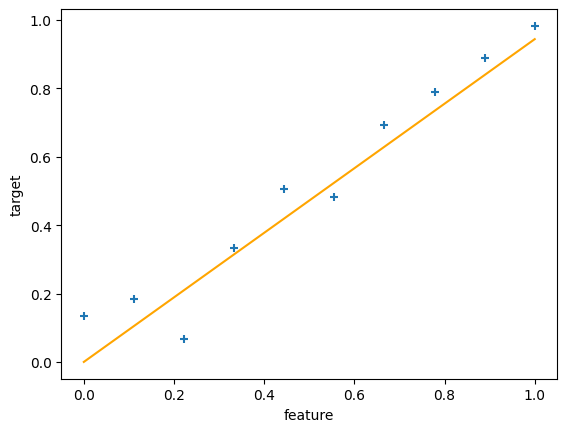

Final weights (β): [[0.94390032]]


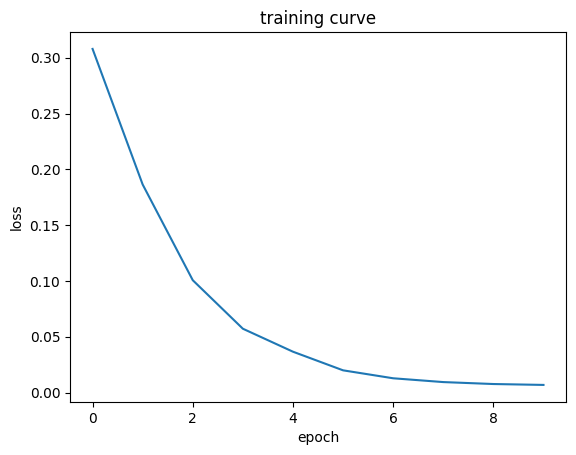

In [47]:
# Hyperparameters
epsilon = 0.1       # Learning rate
epochs = 10         # Maximum number of epochs
tol = 0.001         # Tolerance
batch_size =  3               # Batch size

# Initialize weights β₀ = 0 ∈ ℝᵈ
N,D = xtrain.shape
beta = initialize_beta(D)

# To Store loss
losses = []

# Mini-Batch Gradient Descent
epoch = 0
avg_loss = float("inf")

while epoch < epochs and avg_loss > tol:
    running_loss = 0.0
    idx = np.random.permutation(N)
    X = xtrain[idx]
    y = ytrain[idx]

    for batch_idx in range(0, N, batch_size):
      x_batch = X[batch_idx: batch_idx + batch_size] # select a batch of features
      y_batch = y[batch_idx: batch_idx + batch_size] # and a batch of labels

      ypred = make_prediction(x_batch,beta)
      loss = mean_squared_error(y_batch,ypred)
      grads = gradient_function(x_batch,y_batch,beta)
      beta =update_function(beta,grads,epsilon)
      running_loss += (loss * x_batch.shape[0])

    
    avg_loss = running_loss/ N
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")

    epoch += 1

plot(xtrain, ytrain, beta, epoch)
print("Final weights (β):",beta)
plot_loss(losses)


## LinearRegression Class
Here we have combined all that we have discussed above in to a class. You can see the usage below


Epoch 0, Loss: 1.1960, Val Loss: 1.0161
Epoch 100, Loss: 0.1187, Val Loss: 0.1538
Epoch 200, Loss: 0.0311, Val Loss: 0.0398
Epoch 300, Loss: 0.0144, Val Loss: 0.0146
Epoch 400, Loss: 0.0110, Val Loss: 0.0084


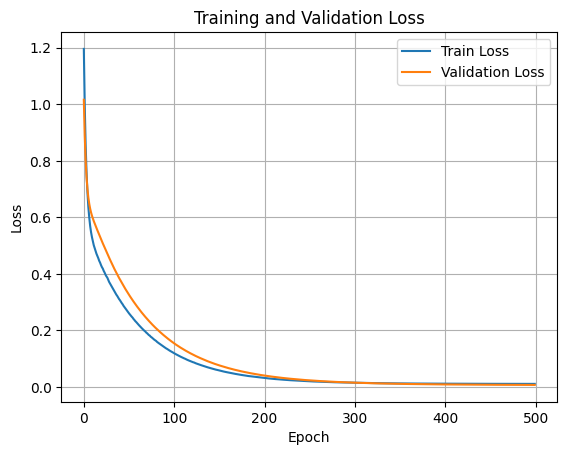

In [48]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from ek_ml_package.linear_regression import LinearRegression
import numpy as np

# Generate some toy data
X = np.random.rand(100, 3)
y = X @ np.array([1.5, -2.0, 1.0]) + 0.5 + np.random.randn(100) * 0.1

# Initialize model
model = LinearRegression(lr=0.01, epochs=500, method='minibatch', batch_size=16, momentum=0.9)

# Train
model.fit(X, y, validation_split=0.2)

# Predict
predictions = model.predict(X)

# Plot loss
model.plot_loss()